In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

## Exploring the Dataset

In [11]:
df = pd.read_csv("/content/fake_job_postings.csv")

In [12]:
df.tail()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0
17879,17880,Web Application Developers,"NZ, N, Wellington",Engineering,NaN,Vend is looking for some awesome new talent to...,Who are we?Vend is an award winning web based ...,We want to hear from you if:You have an in-dep...,NaN,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Engineering,0


In [13]:
df.shape

(17880, 18)

In [14]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [15]:
df.isnull().sum()

,0
job_id,0
title,0
location,346
department,11547
salary_range,15012
company_profile,3308
description,1
requirements,2696
benefits,7212
telecommuting,0


In [21]:
# Let's remove the columns which are not necessary
df.drop(['salary_range', 'telecommuting', 'has_company_logo', 'has_questions'],axis=1,inplace = True)

In [23]:
df.shape

(17880, 10)

In [24]:
df.head()

,title,location,department,description,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"Food52, a fast-growing, James Beard Award-winn...",Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,Organised - Focused - Vibrant - Awesome!Do you...,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,"Our client, located in Houston, is actively se...",NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,THE COMPANY: ESRI – Environmental Systems Rese...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,JOB TITLE: Itemization Review ManagerLOCATION:...,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [28]:
#filled NaN values with blank space
df.fillna(' ', inplace=True)

In [29]:
#Create independent and Dependent Features
columns = df.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["fraudulent"]]
# Store the variable we are predicting
target = "fraudulent"
# Define a random state
state = np.random.RandomState(42)
X = df[columns]
Y = df["fraudulent"]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Shapes of X & Y
print(X.shape)
print(Y.shape)
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler()
X_res, y_res = under_sampler.fit_resample(X, Y)

df1 = pd.DataFrame(X_res)

df2 = pd.DataFrame(y_res)

result = pd.concat([df1, df2], axis=1, join='inner')
display(result)
data=result;

(17880, 9)
(17880,)


,title,location,department,description,employment_type,required_experience,required_education,industry,function,fraudulent
5882,Project manager,"SE, , Stockholm",Technical,MAG Interactive has rapidly become one of the ...,Full-time,Mid-Senior level,,Computer Software,Project Management,0
16652,Freelance Interpreters in London,"GB, LND,",Freelancer,We are currently seeking Freelance Face-to-Fac...,Part-time,Entry level,Bachelor's Degree,Translation and Localization,,0
7400,OX1 2JD Customer Service Apprenticeship Under ...,"GB, OXF, Oxford",,Government funding is only available for 16-18...,Full-time,Not Applicable,High School or equivalent,Business Supplies and Equipment,Customer Service,0
7208,Back-End Developer,"US, NY, New York City",,About WiseBanyanWiseBanyan is the first free o...,Full-time,,,Financial Services,Engineering,0
16104,Software Engineer - GIS Specialist,"US, CO, Centennial",,Summary: FHU is currently looking to expand ou...,Full-time,,,Civil Engineering,,0
...,...,...,...,...,...,...,...,...,...,...
17827,Student Positions Part-Time and Full-Time.,"US, CA, Los Angeles",,Student Positions Part-Time and Full-Time.You ...,Part-time,,,,,1
17828,Sales Associate,"AU, NSW, Sydney",Sales and Marketing,LEARN TO EARN AN EXECUTIVE LEVEL INCOMEFULL TR...,,,,,,1
17829,Android Developer,"PL, MZ, Warsaw",,inFullMobile Sp. z o.o. is a mobile software d...,,,,,,1
17830,Payroll Clerk,"US, NY, New York",,JOB DESCRIPTIONWe are seeking a full time payr...,Full-time,,,Apparel & Fashion,Accounting/Auditing,1


In [30]:
data.isnull().sum()

,0
title,0
location,0
department,0
description,0
employment_type,0
required_experience,0
required_education,0
industry,0
function,0
fraudulent,0


## EDA

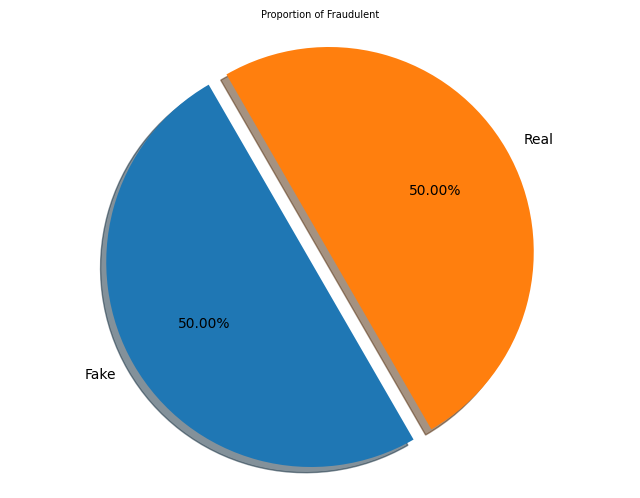

In [31]:
# Checking for distribution of class label(percentages belonging to real class and percentages belonging to fraud class)
 # in the data 1 indicates fraud post
 # 0 indicating real post
 # Plotting pie chart for the data
 # function of Explode function: how the portion will appear (to understand change explode=(0,0.5))

labels = 'Fake', 'Real'
sizes = [data.fraudulent[data['fraudulent']== 1].count(), data.fraudulent[data['fraudulent']== 0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(8, 6)) #size of the pie chart
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=120) #autopct %1.2f%% for 2 digit precision
ax1.axis('equal')
plt.title("Proportion of Fraudulent", size = 7)
plt.show()

In [32]:
# we will try to see which country is posting most of the jobs
# Visualize job postings by countries
# we will use the location column for visualizing this data
# In location data is of type (country_name,state,city)
# we neeed to know the country wise data

def split(location):
    l = location.split(',')
    return l[0]

data['country'] = data.location.apply(split)
data['country']

,country
5882,SE
16652,GB
7400,GB
7208,US
16104,US
...,...
17827,US
17828,AU
17829,PL
17830,US


In [33]:
# this will give unique country values
data['country'].nunique()

50

In [34]:
# top 10 country that post jobs
data['country'].value_counts()[:11]

,count
country,
US,1216
GB,139
GR,61
AU,52
,40
CA,31
DE,25
IN,17
NZ,17


Text(0.5, 0, 'Countries')

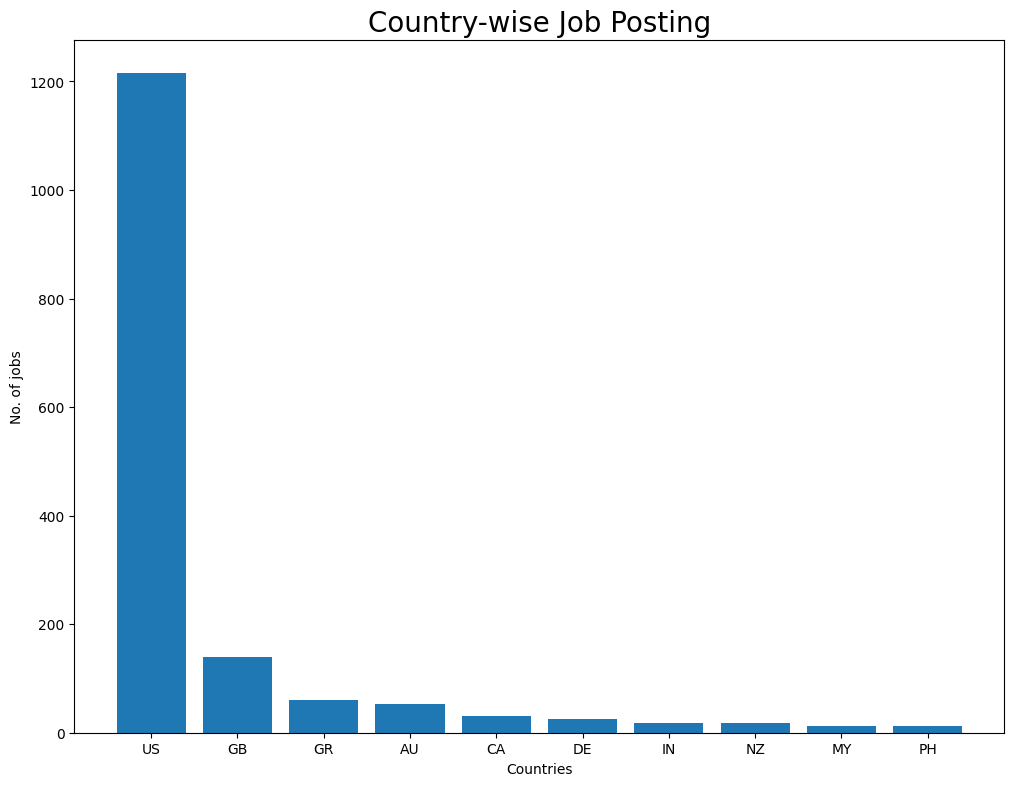

In [35]:
# creating a dictionary(key-value pair) with top 10 country
country = dict(data.country.value_counts()[:11])
del country[' '] #deleting country with space values
plt.figure(figsize=(12,9))
plt.title('Country-wise Job Posting', size=20)
plt.bar(country.keys(), country.values()) #(xaxis,yaxis)
plt.ylabel('No. of jobs', size=10)
plt.xlabel('Countries', size=10)

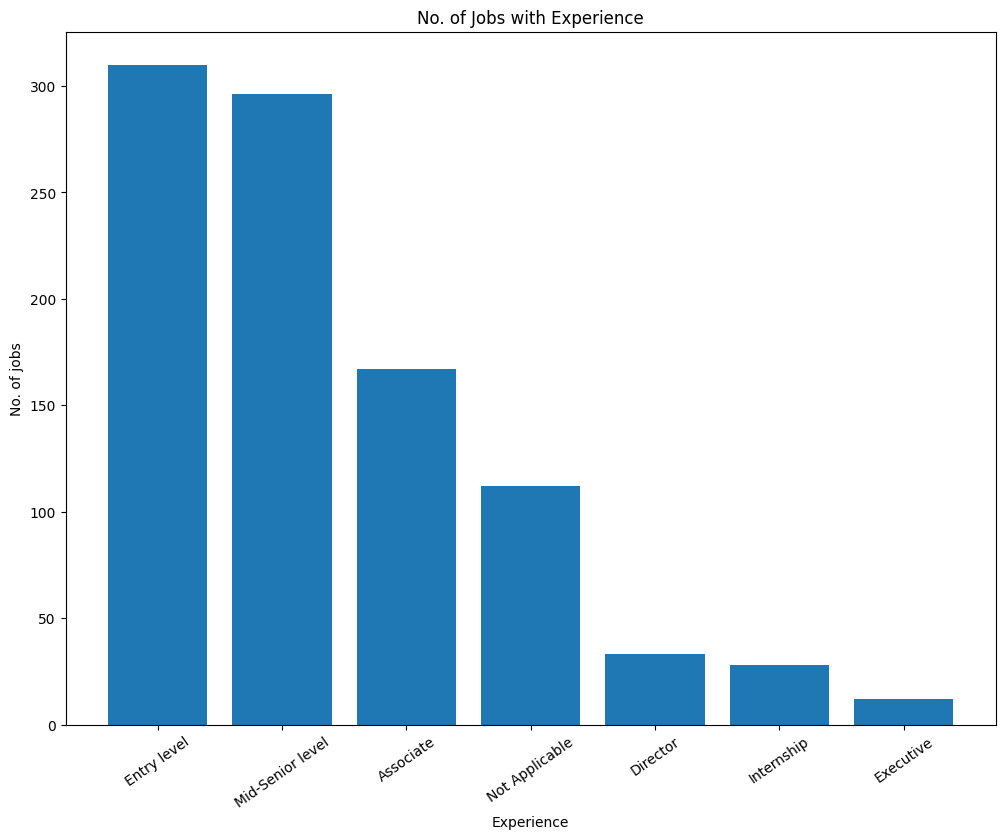

In [36]:
# visualizing jobs based on experience
experience = dict(data.required_experience.value_counts())
del experience[' ']
plt.figure(figsize=(12,9))
plt.bar(experience.keys(), experience.values())
plt.title('No. of Jobs with Experience')
plt.xlabel('Experience', size=10)
plt.ylabel('No. of jobs', size=10)
plt.xticks(rotation=35)
plt.show()

In [37]:
#Most frequent jobs
print(data.title.value_counts()[:10])

title
Cruise Staff Wanted *URGENT*                                            21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Data Entry Admin/Clerical Positions - Work From Home                    21
Customer Service Representative                                         19
Administrative Assistant                                                19
English Teacher Abroad                                                  12
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Network Marketing                                                       10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Data Entry                                                              10
Name: count, dtype: int64


In [38]:
# checking for most fake jobs based on title
print(data[data.fraudulent==1].title.value_counts()[:10])

title
Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Payroll Clerk                                                           10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Name: count, dtype: int64


## Data Preparation

In [50]:
# NLTK :: Natural Language Toolkit
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [51]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [52]:
#loading the stopwords
stop_words = set(stopwords.words("english"))

In [53]:
#converting all the text to lower case
data['text'] = data['text'].apply(lambda x:x.lower())

In [54]:
#removing the stop words from the corpus
data['text'] = data['text'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop_words)]))

In [56]:
data['text']

,text
5882,"project manager se, , stockholm mag interactiv..."
16652,"freelance interpreters london gb, lnd, current..."
7400,ox1 2jd customer service apprenticeship nas 16...
7208,"back-end developer us, ny, new york city wiseb..."
16104,"software engineer - gis specialist us, co, cen..."
...,...
17827,"student positions part-time full-time. us, ca,..."
17828,"sales associate au, nsw, sydney learn earn exe..."
17829,"android developer pl, mz, warsaw infullmobile ..."
17830,"payroll clerk us, ny, new york job description..."


In [57]:
from sklearn.model_selection import train_test_split
# Splitting dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(data.text, data.fraudulent, test_size=0.3)

In [58]:
print(y_train)
print(X_train)

9073     0
9098     1
17775    1
2379     1
16767    0
        ..
5100     0
17730    1
2977     1
11549    1
12071    0
Name: fraudulent, Length: 1212, dtype: int64
9073     ui designer us, tx, austin ui (user interface)...
9098     restaurant manager restaurant managers ensure ...
17775    administrative clerk us, , processing letters,...
2379     administrative assistant/receptionist us, fl, ...
16767    software build engineer gb, lnd, piccadilly po...
                               ...                        
5100     web developer gr, i, athens due continued grow...
17730    licensed life insurance agent us, wa, seattle ...
2977     administrative assistant/customer service us, ...
11549    technical program manager us, ca, san mateo te...
12071    mechanical design sleuth us, or, portland comp...
Name: text, Length: 1212, dtype: object


In [59]:


# The model cannot operate text data so we need to convert our data into vector format
# we will be using Bag of words model
from sklearn.feature_extraction.text import CountVectorizer

#  instantiate the vectorizer
vect = CountVectorizer()

# learn training data vocabulary, then use it to create a document-term matrix
# fit
vect.fit(X_train)

# transform training data
X_train_dtm = vect.transform(X_train)



# examine the document-term matrix
X_train_dtm

#how X_train_dtm is looking
print(X_train_dtm)
# This is Matrix representation,non 0 valued cells are not printed

  (0, 677)	2
  (0, 806)	1
  (0, 966)	3
  (0, 1133)	1
  (0, 1160)	1
  (0, 1168)	1
  (0, 1176)	1
  (0, 1301)	2
  (0, 1431)	1
  (0, 1450)	3
  (0, 1552)	1
  (0, 1553)	2
  (0, 1634)	1
  (0, 1862)	1
  (0, 1903)	1
  (0, 1942)	1
  (0, 2125)	1
  (0, 2185)	1
  (0, 2240)	1
  (0, 2376)	1
  (0, 2517)	1
  (0, 2534)	1
  (0, 2622)	1
  (0, 2724)	1
  (0, 2727)	1
  :	:
  (1211, 11110)	1
  (1211, 11238)	1
  (1211, 11309)	1
  (1211, 11448)	1
  (1211, 11618)	1
  (1211, 11842)	1
  (1211, 11889)	1
  (1211, 11893)	1
  (1211, 11901)	1
  (1211, 11978)	1
  (1211, 12109)	1
  (1211, 12193)	1
  (1211, 12259)	1
  (1211, 12331)	2
  (1211, 12751)	1
  (1211, 12923)	1
  (1211, 13134)	1
  (1211, 13157)	1
  (1211, 13202)	1
  (1211, 13250)	1
  (1211, 13263)	1
  (1211, 13411)	1
  (1211, 13499)	1
  (1211, 13564)	5
  (1211, 13568)	1


In [60]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<520x13647 sparse matrix of type '<class 'numpy.int64'>'
	with 44603 stored elements in Compressed Sparse Row format>

## Model Building and Evaluation

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

## Naive Bayes

In [63]:
# Naive Bayes Classifier
# we are using Multinomial Naive Bayes approach because the data here is not symmetrical.
nb = MultinomialNB()
%time nb.fit(X_train_dtm, y_train)

CPU times: user 7.77 ms, sys: 0 ns, total: 7.77 ms
Wall time: 22.5 ms


MultinomialNB()

In [64]:
y_pred_nb = nb.predict(X_test_dtm)
print(y_pred_nb)

[0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0
 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0
 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0
 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0
 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0
 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1
 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0
 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1
 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1
 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1
 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1
 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0
 0 1 1 1 0 0 0 0 1 1 1 0 

Accuracy: 0.8576923076923076
Report

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       256
           1       0.87      0.85      0.86       264

    accuracy                           0.86       520
   macro avg       0.86      0.86      0.86       520
weighted avg       0.86      0.86      0.86       520

Confusion Matrix

[[221  35]
 [ 39 225]]


Text(95.72222222222221, 0.5, 'Truth')

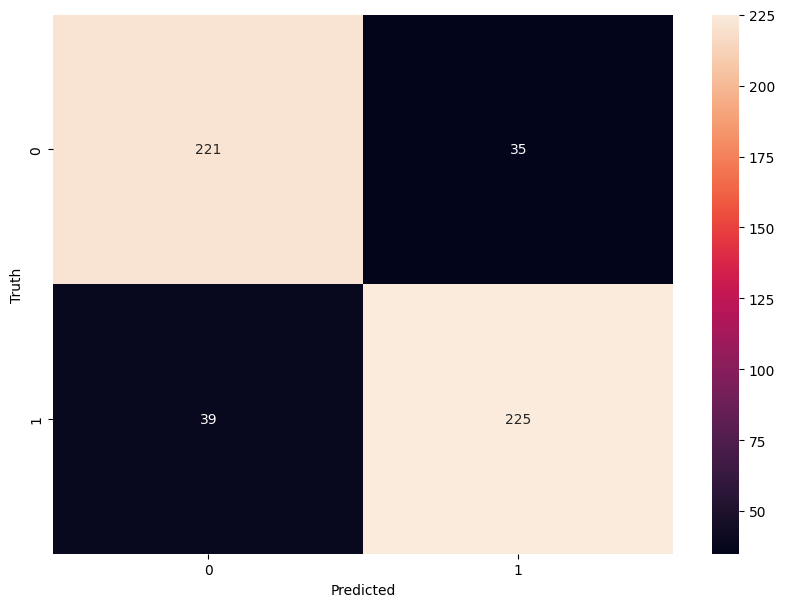

In [67]:
# Model Accuracy
accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Report\n")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_nb))


cm = confusion_matrix(y_test,y_pred_nb)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Decision Tree

In [68]:
dt = DecisionTreeClassifier()

In [69]:
%time dt.fit(X_train_dtm, y_train)

CPU times: user 414 ms, sys: 0 ns, total: 414 ms
Wall time: 444 ms


DecisionTreeClassifier()

In [70]:
#class predictions for X_test_dtm
y_pred_class = dt.predict(X_test_dtm)

In [71]:
# Model Accuracy
print("Classification Accuracy:", accuracy_score(y_test, y_pred_class))
print("Classification Report\n")
print(classification_report(y_test, y_pred_class))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_class))

Classification Accuracy: 0.7980769230769231
Classification Report

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       256
           1       0.81      0.79      0.80       264

    accuracy                           0.80       520
   macro avg       0.80      0.80      0.80       520
weighted avg       0.80      0.80      0.80       520

Confusion Matrix

[[207  49]
 [ 56 208]]


Text(95.72222222222221, 0.5, 'Truth')

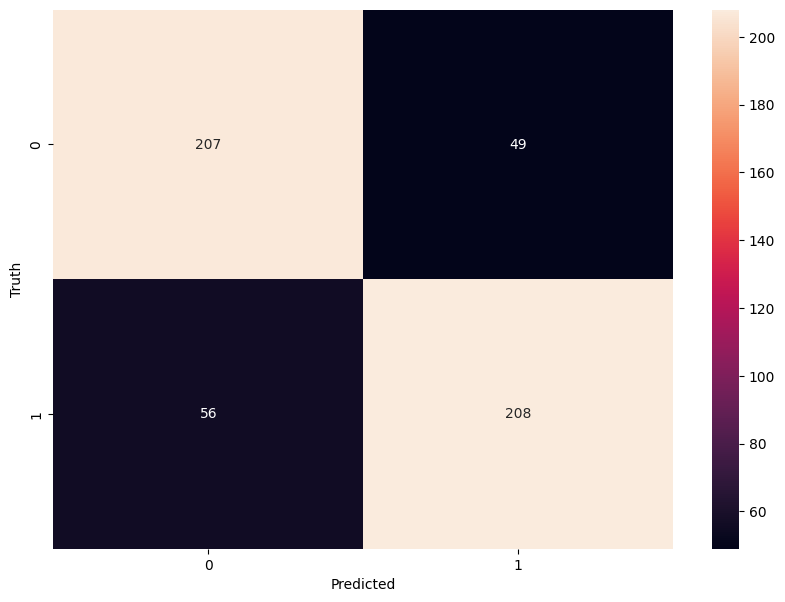

In [72]:
import seaborn as sn
cm = confusion_matrix(y_test,y_pred_class)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Prediction

In [73]:
X_test

,text
15431,"insurance agent/agency owners us, , come join ..."
11739,"ust testing technician us, ca, bakersfield, ca..."
7766,"music editor gb, lnd, london dice building edi..."
2398,"support technician / help desk support gb, chw..."
4183,"customer services rep( full time position) us,..."
...,...
8186,"senior security development engineer us, ny, n..."
2051,"maintenance supervisor us, oh, cincinnati main..."
17575,"customer service reps us, ca, seeking customer..."
14286,"business analyst us, mi, detroit (we 1500+ job..."


In [85]:
input_text=["ust testing technician us, ca, bakersfield, ca qualified candidates encouraged apply directly job posting. direct email phone calls considered. thank cooperation. please recruiters. ust testing technician | bakersfield, calocal petroleum company seeking experienced technician perform general maintenance confined spaces gas stations. position:seeking dynamic individual fast paced environment. ideal candidates general maintenance experience gas station working pumps underground storage tanks.primary responsibilities:working gas stationswilling travelbe able work confined spacesgeneral maintenance experiencemust possess valid drivers license clean dmvbe able assist 989/ust testing technicians unexpected situations oil & energy"]


In [86]:
# convert text to feature vectors
input_data_features = vect.transform(input_text)

# making prediction

prediction = dt.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Fraudulant Job')

else:
  print('Real Job')

[1]
Fraudulant Job


In [82]:
#checking wether predicted result was correct or not
print(y_test[11739])

1
